
# Exercices Avancés : Exploration des Données (EDA)

Ce notebook contient une série d'exercices avancés basés sur **NumPy, Pandas, et Seaborn** pour explorer et analyser des données.
Les exercices utiliseront le dataset **Pokemon** et permettront de maîtriser les fondamentaux de l'analyse exploratoire des données (EDA).

## Objectifs :
1. **NumPy** : Manipulation avancée de tableaux multidimensionnels.
2. **Pandas** : Nettoyage, transformation et analyse de données.
3. **Seaborn & Matplotlib** : Visualisation avancée des données.
4. **Exploration des données Pokémon** : Analyse statistique et visualisation avancée.

---


In [2]:

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset Pokemon

df = pd.read_csv("pokemon.csv")

# Affichage des premières lignes du dataset
df.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0



## Exercice 1 : Manipulation avancée avec NumPy

1. Créez un tableau NumPy **3x3** contenant des nombres aléatoires entre 1 et 100.
2. Remplacez les éléments supérieurs à 50 par 1 et les autres par 0.
3. Calculez la moyenne et l'écart-type du tableau obtenu.
4. Générez un tableau **5x5** avec des valeurs suivant une distribution normale (moyenne=10, écart-type=3).
5. Calculez la somme des colonnes et des lignes du tableau précédent.


In [3]:

# 1. Création d'un tableau 3x3 de nombres aléatoires entre 1 et 100

arr_3x3 = np.random.randint(1, 101, (3,3))

# 2. Remplacement des valeurs supérieures à 50 par 1 et le reste par 0

arr_3x3_binary = np.where(arr_3x3 > 50, 1, 0)

# 3. Calcul de la moyenne et de l'écart-type
moyenne = arr_3x3_binary.mean()
ecart_type = arr_3x3_binary.std()
print("Moyenne :", moyenne)
print("Écart-type :", ecart_type)

# 4. Génération d'un tableau 5x5 avec une distribution normale (moyenne=10, écart-type=3)
arr_5x5 = np.random.normal(loc=10, scale=5, size=(5,5))


# 5. Somme des colonnes et des lignes

somme_lignes = arr_5x5.sum(axis=1)
somme_colonnes = arr_5x5.sum(axis=0)
print("Somme des lignes :", somme_lignes)
print("Somme des colonnes :", somme_colonnes)

# Affichage des résultats


Moyenne : 0.6666666666666666
Écart-type : 0.4714045207910317
Somme des lignes : [64.11706445 50.37379419 48.73420752 38.2709803  57.078605  ]
Somme des colonnes : [64.3112406  49.97164444 31.43555493 63.49173553 49.36447598]



## Exercice 2 : Analyse exploratoire avec Pandas

1. Affichez les informations générales du dataset Pokémon.
2. Identifiez les valeurs manquantes et traitez-les.
3. Quelle est la moyenne des points d’attaque pour chaque type de Pokémon ?
4. Ajoutez une colonne "Attaque/Défense" représentant le rapport entre l'attaque et la défense.
5. Filtrez les Pokémon légendaires ayant une attaque supérieure à 120.


In [4]:

# 1. Informations générales sur le dataset
print(df.info())

# 2. Vérification des valeurs manquantes

print(df.isnull().sum())


# 3. Moyenne des points d'attaque pour chaque type de Pokémon
moyenne_attaque_par_type = df.groupby('type1')['attack'].mean()
print("Moyenne d'attaque par type ", moyenne_attaque_par_type)

# 4. Ajout de la colonne "Attaque/Défense"

df['Attaque/defense'] = df['attack'] / df['defense']

# 5. Filtrage des Pokémon légendaires avec une attaque > 120
is_legendary_high_attack = df[(df['is_legendary'] == True) & (df['attack'] > 120)]
print("Pokémon légendaires avec une attaque > 120 :")

# Affichage des résultats
is_legendary_high_attack

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Attaque/defense
149,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.00,1.0,0.5,1.0,1.0,2.0,...,150,194,120,140,psychic,NaN,122.0,1,1,2.142857
249,"['Pressure', 'Regenerator']",0.25,1.0,1.0,2.00,0.5,0.5,0.5,1.0,1.0,...,250,110,154,90,fire,flying,199.0,2,1,1.444444
380,['Levitate'],2.00,2.0,2.0,0.50,2.0,0.5,0.5,1.0,2.0,...,381,160,120,110,dragon,psychic,60.0,3,1,1.300000
381,['Drizzle'],1.00,1.0,1.0,2.00,1.0,1.0,0.5,1.0,1.0,...,382,180,160,90,water,NaN,352.0,3,1,1.666667
382,['Drought'],1.00,1.0,1.0,0.00,1.0,1.0,1.0,1.0,1.0,...,383,150,90,90,ground,NaN,950.0,3,1,1.125000
383,['Air Lock'],0.50,1.0,2.0,1.00,2.0,0.5,0.5,1.0,1.0,...,384,180,100,115,dragon,flying,206.5,3,1,1.800000
481,['Levitate'],2.00,2.0,1.0,1.00,1.0,0.5,1.0,1.0,2.0,...,482,125,70,115,psychic,NaN,0.3,4,1,1.785714
485,['Slow Start'],1.00,1.0,1.0,1.00,1.0,2.0,1.0,1.0,0.0,...,486,80,110,100,normal,NaN,420.0,4,1,1.454545
638,['Justified'],0.50,0.5,1.0,1.00,2.0,2.0,0.5,1.0,1.0,...,639,72,90,108,rock,fighting,260.0,5,1,1.433333
643,['Teravolt'],1.00,1.0,2.0,0.25,2.0,1.0,0.5,0.5,1.0,...,644,120,100,90,dragon,electric,345.0,5,1,1.250000



## Exercice 3 : Visualisation avec Seaborn et Matplotlib

1. Tracez un histogramme de la distribution des points d'attaque.
2. Réalisez un boxplot des statistiques d'attaque par type de Pokémon.
3. Tracez un scatter plot montrant la relation entre l’attaque et la défense.
4. Ajoutez une régression linéaire sur le scatter plot.
5. Créez une heatmap de la corrélation entre les caractéristiques numériques du dataset.


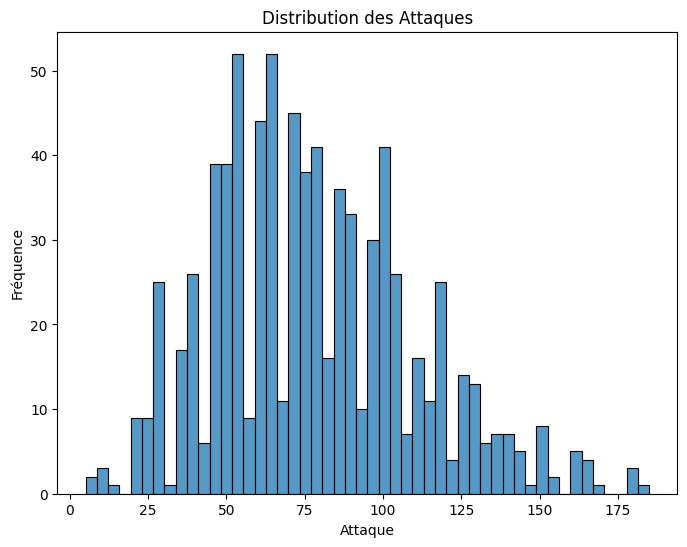

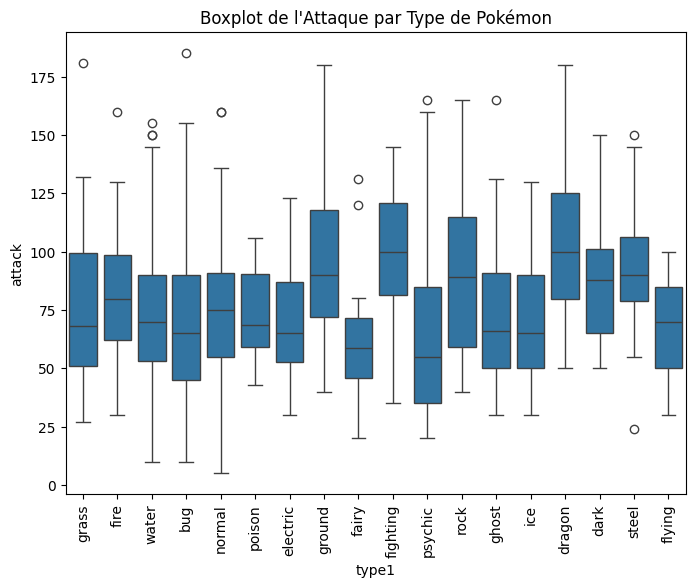

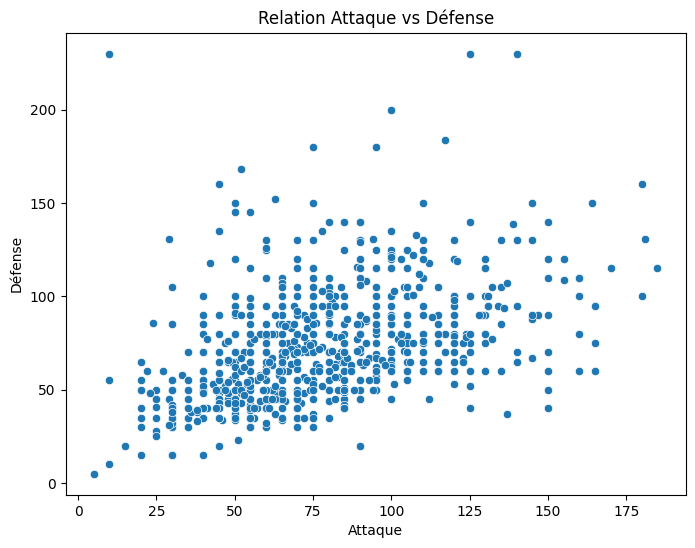

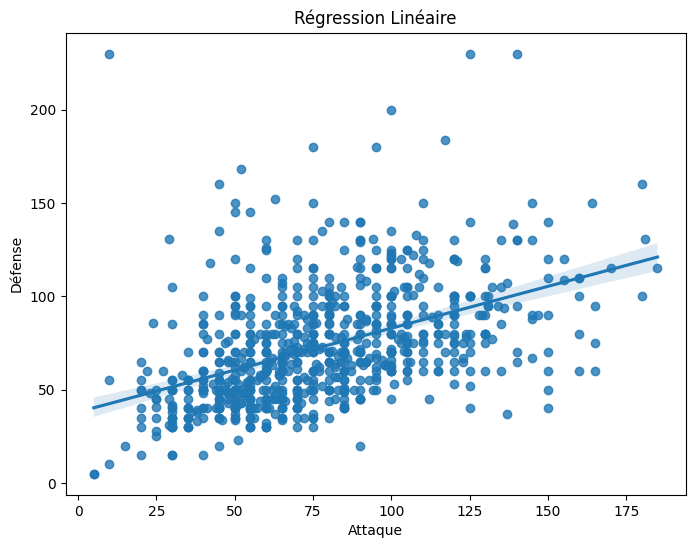

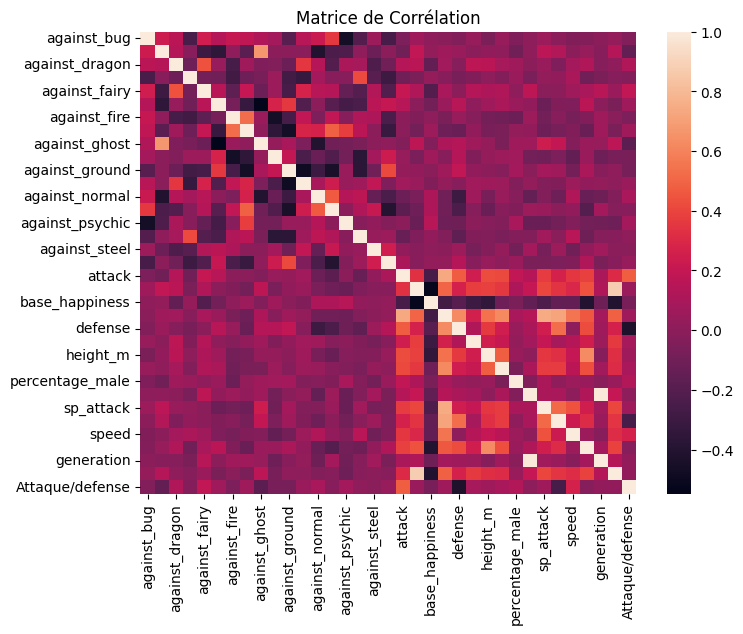

In [5]:

# 1. Histogramme de la distribution des attaques

plt.figure(figsize=(8,6))
sns.histplot(df['attack'], bins=50)
plt.title("Distribution des Attaques")
plt.xlabel("Attaque")
plt.ylabel("Fréquence")
plt.show()

# 2. Boxplot des attaques par type de Pokémon
plt.figure(figsize=(8,6))
sns.boxplot(x='type1', y='attack', data=df)
plt.title("Boxplot de l'Attaque par Type de Pokémon")
plt.xticks(rotation=90)
plt.show()


# 3. Scatter plot de la relation Attaque-Défense
plt.figure(figsize=(8,6))
sns.scatterplot(x='attack', y='defense', data=df)
plt.title("Relation Attaque vs Défense")
plt.xlabel("Attaque")
plt.ylabel("Défense")
plt.show()

# 4. Régression linéaire sur le scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='attack', y='defense', data=df)
plt.title("Régression Linéaire")
plt.xlabel("Attaque")
plt.ylabel("Défense")
plt.show()
# 5. Heatmap des corrélations
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr)
plt.title("Matrice de Corrélation")
plt.show()


## Conclusion

Ce notebook a couvert divers aspects de l'analyse exploratoire des données (EDA), en utilisant **NumPy, Pandas et Seaborn**. Vous avez manipulé des tableaux, exploré un dataset réel, et créé des visualisations utiles.

N'hésitez pas à tester d'autres analyses sur le dataset pour approfondir vos compétences en EDA ! 🚀



## Exercice 4 : NumPy - Manipulation Avancée

1. Créez une matrice **10x10** remplie aléatoirement avec des valeurs entre -50 et 50.
2. Remplacez toutes les valeurs négatives par leur valeur absolue.
3. Normalisez la matrice pour que toutes les valeurs soient comprises entre 0 et 1.
4. Trouvez les indices du **minimum** et du **maximum** dans cette matrice.
5. Calculez la somme cumulative de chaque colonne.


In [6]:

# 1. Création d'une matrice 10x10 avec des valeurs entre -50 et 50
matrice = np.random.randint(-50, 51, (10,10))

# 2. Remplacement des valeurs négatives par leur valeur absolue
matrice = np.where(matrice < 0, np.abs(matrice), matrice)

# 3. Normalisation entre 0 et 1
mat_min = matrice.min()
mat_max = matrice.max()
mat_normalized = (matrice - mat_min) / (mat_max - mat_min)

# 4. Indices du minimum et du maximum
min_index = np.unravel_index(np.argmin(mat_normalized), mat_normalized.shape)
max_index = np.unravel_index(np.argmax(mat_normalized), mat_normalized.shape)
print("Index du minimum :", min_index)
print("Index du maximum :", max_index)

# 5. Somme cumulative de chaque colonne
somme_cumulative_colonnes = np.cumsum(mat_normalized, axis=0)
print("Somme cumulative par colonne :\n", somme_cumulative_colonnes)

Index du minimum : (0, 0)
Index du maximum : (1, 3)
Somme cumulative par colonne :
 [[0.   0.66 0.98 0.12 0.92 0.52 0.14 0.84 0.28 0.12]
 [0.1  0.74 1.36 1.12 1.34 1.32 0.48 0.86 1.1  0.14]
 [1.   1.06 1.88 1.48 2.12 2.22 1.1  1.54 1.24 0.9 ]
 [1.36 1.98 2.46 1.88 3.12 2.64 2.06 1.54 1.28 0.98]
 [2.22 1.98 3.02 2.18 3.42 3.2  2.54 2.32 1.74 1.8 ]
 [2.36 2.62 3.18 2.68 3.82 3.66 2.9  2.84 2.4  2.24]
 [2.88 2.72 4.14 3.24 4.82 4.38 3.38 3.36 2.68 3.06]
 [3.24 2.96 5.08 3.88 5.1  4.78 4.32 3.68 2.7  4.  ]
 [3.4  3.82 5.46 4.26 5.46 5.46 4.34 4.4  3.42 4.22]
 [4.14 4.28 5.86 5.2  5.62 5.5  4.48 4.46 3.94 4.88]]



## Exercice 5 : Pandas - Analyse des Statistiques des Pokémon

1. Calculez le **top 5 des Pokémon les plus rapides**.
2. Déterminez le **nombre de Pokémon par type principal**.
3. Ajoutez une colonne `hp/speed` représentant le ratio entre les points de vie et la vitesse.
4. Filtrez les Pokémon ayant une **vitesse supérieure à 100** et une **défense inférieure à 60**.
5. Déterminez le **type de Pokémon ayant en moyenne la plus forte attaque spéciale**.


In [7]:

# 1. Top 5 des Pokémon les plus rapides
top_5_speed = df.nlargest(5, 'speed')
print("Top 5 Pokémon les plus rapides :\n", top_5_speed[['name','speed']])

# 2. Nombre de Pokémon par type principal
count_by_type = df['type1'].value_counts()
print("Nombre de Pokémon par type principal :\n", count_by_type)

# 3. Ajout de la colonne hp/speed
df['hp/speed'] = df['hp'] / df['speed']


# 4. Filtrage des Pokémon rapides avec faible défense
filtered_pokemon = df[(df['attack'] > 100) & (df['defense'] < 60)]
print("Pokémon avec Attaque > 100 et Défense < 60 :\n", filtered_pokemon[['name','attack','defense']])


# 5. Type ayant en moyenne la plus forte attaque spéciale

type_highest_spatk = df.groupby('type1')['sp_attack'].mean().idxmax()
print("Type avec la plus forte Attaque Spéciale moyenne :", type_highest_spatk)

Top 5 Pokémon les plus rapides :
           name  speed
385     Deoxys    180
290    Ninjask    160
794  Pheromosa    151
64    Alakazam    150
100  Electrode    150
Nombre de Pokémon par type principal :
 type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64
Pokémon avec Attaque > 100 et Défense < 60 :
           name  attack  defense
14    Beedrill     150       40
105  Hitmonlee     120       53
407   Cranidos     125       40
418   Floatzel     105       55
429  Honchkrow     125       52
565     Archen     112       45
680  Aegislash     150       50
794  Pheromosa     137       37
798   Guzzlord     101       53
Type avec la plus forte Attaque Spéciale moyenne : psychic



## Exercice 6 : Pandas - Nettoyage et Préparation des Données

1. Remplacez les valeurs manquantes par la **médiane** de chaque colonne.
2. Convertissez la colonne `is_legendary` en booléen (True/False).
3. Créez une colonne `attack Strength` qui est égale à `"High"` si l'attaque est >100, `"Medium"` si elle est entre 50 et 100, sinon `"Low"`.
4. Supprimez les Pokémon ayant une vitesse inférieure à la médiane.
5. Normalisez toutes les statistiques numériques entre 0 et 1.


In [8]:

# 1. Remplacement des valeurs manquantes par la médiane
df.fillna(df.median(numeric_only=True), inplace=True)

# 2. Conversion de la colonne is_legendary en booléen
df['is_legendary'] = df['is_legendary'].astype(bool)

# 3. Création de la colonne attack Strength
def get_attack_strength(attack):
    if attack > 100:
        return "High"
    elif 50 <= attack <= 100:
        return "Medium"
    else:
        return "Low"

df['attack Strength'] = df['attack'].apply(get_attack_strength)

# 4. Suppression des Pokémon ayant une vitesse inférieure à la médiane
median_speed = df['speed'].median()
df = df[df['speed'] >= median_speed]

# 5. Normalisation des colonnes numériques entre 0 et 1

numerical_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())

<ipython-input-8-f8910ce8cf67>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())



## Exercice 7 : Seaborn - Visualisation Avancée

1. Créez un **pairplot** pour visualiser les relations entre les statistiques principales.
2. Réalisez un **barplot** des attaques moyennes par type de Pokémon.
3. Affichez un **jointplot** de l'attaque et de la défense.
4. Tracez une **heatmap** des corrélations entre les statistiques.
5. Réalisez un **violinplot** montrant la répartition des hp par type de Pokémon.


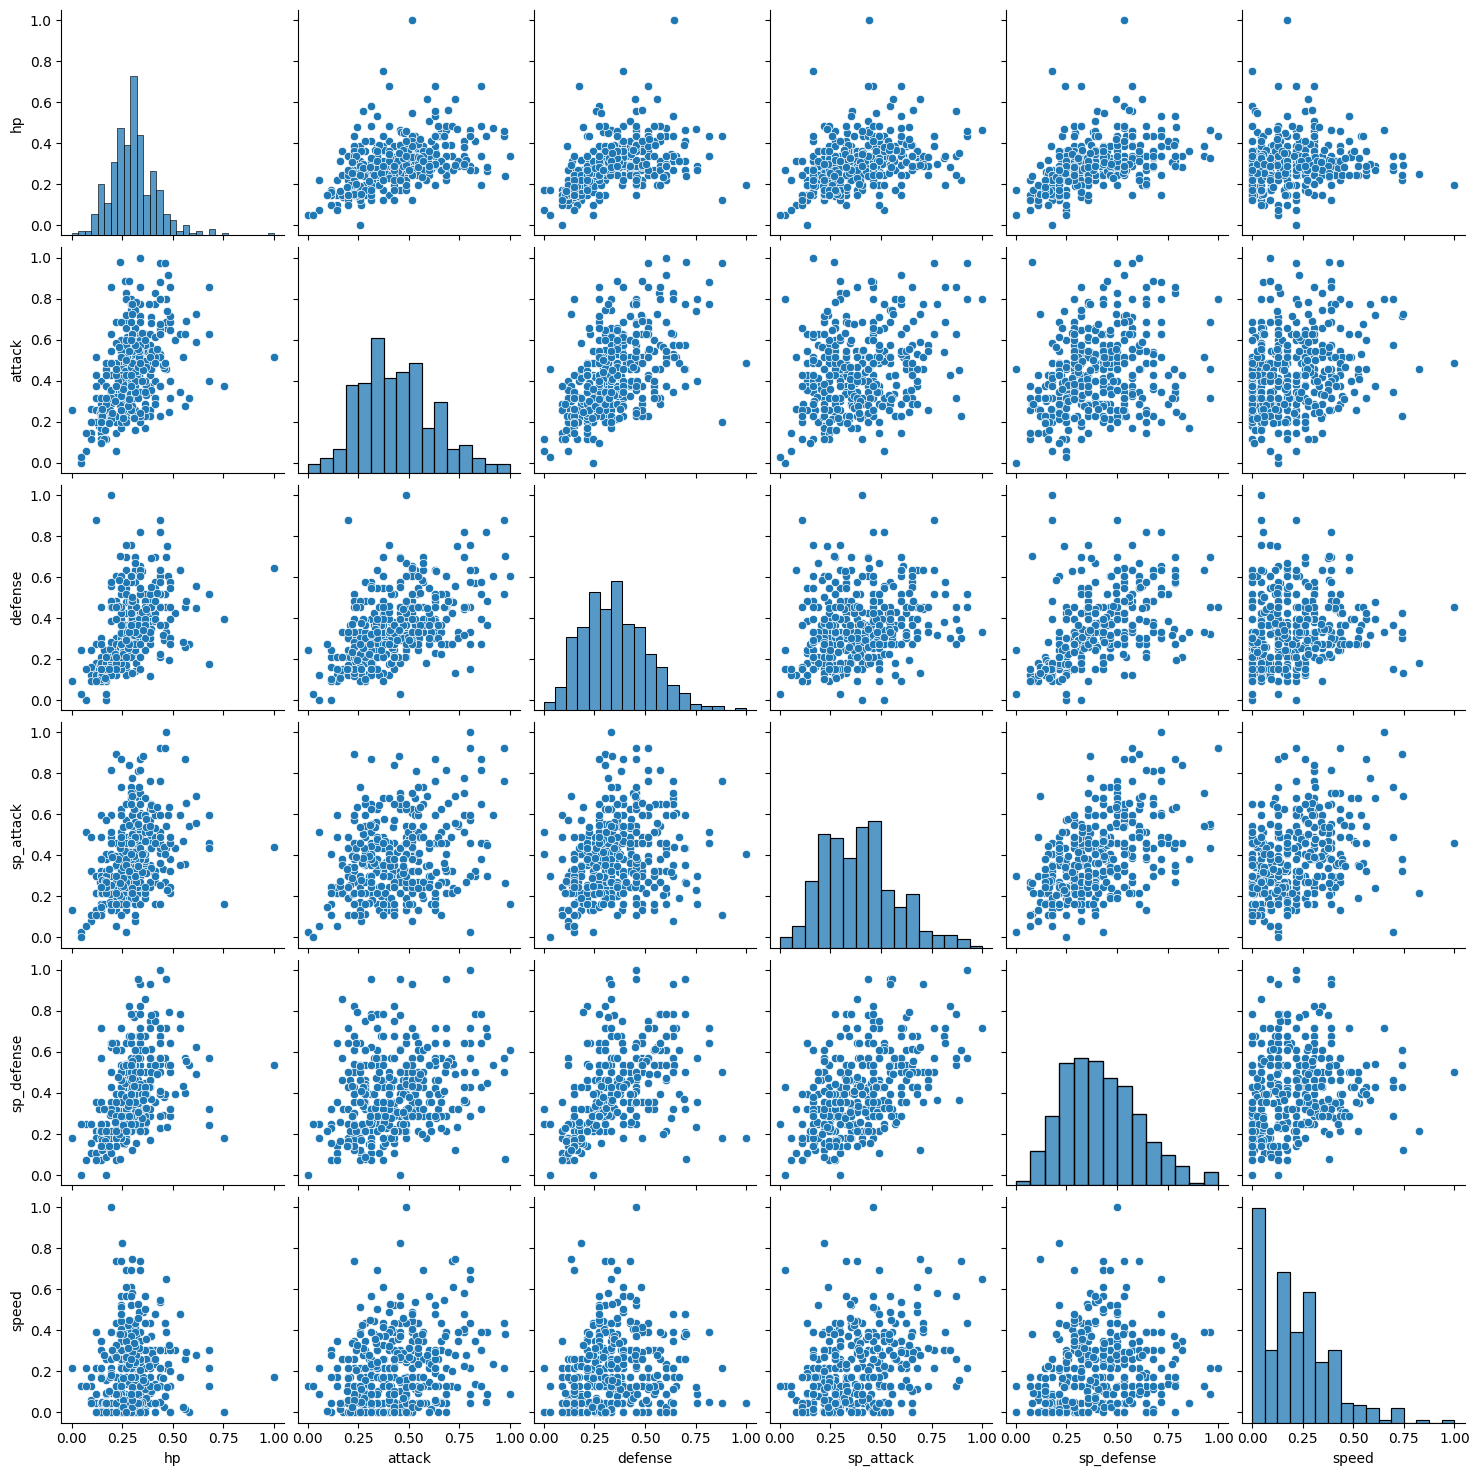

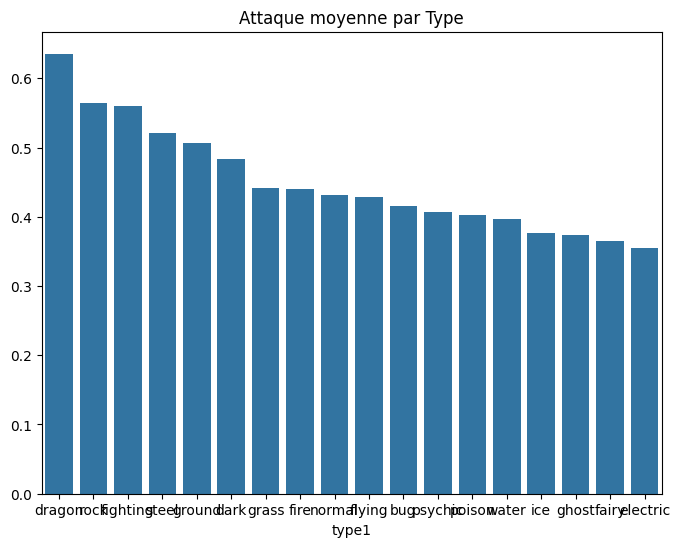

In [11]:

# 1. Pairplot des statistiques principales
stats_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
sns.pairplot(df[stats_cols])
plt.show()

# 2. Barplot des attaques moyennes par type

plt.figure(figsize=(8,6))
mean_attack_by_type = df.groupby('type1')['attack'].mean().sort_values(ascending=False)
sns.barplot(x=mean_attack_by_type.index, y=mean_attack_by_type.values)
plt.title("Attaque moyenne par Type")
plt.xticks()
plt.show()


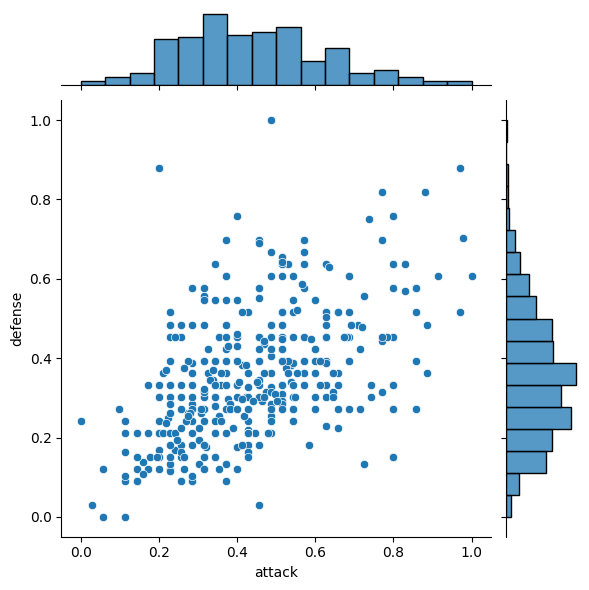

In [12]:

# 3. Jointplot Attaque vs Défense
sns.jointplot(x='attack', y='defense', data=df, kind='scatter')
plt.show()

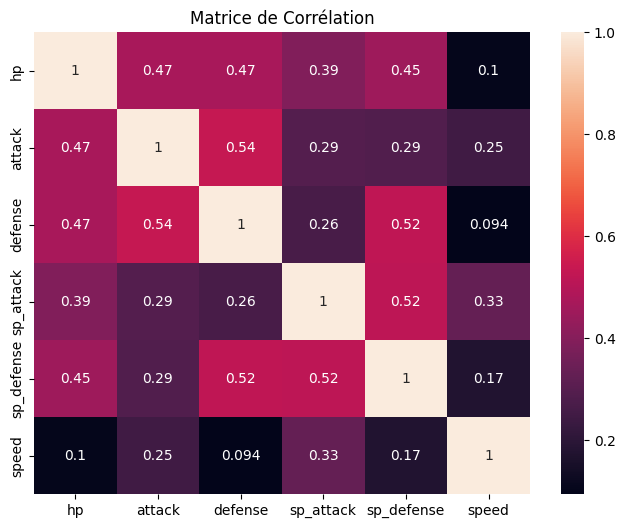

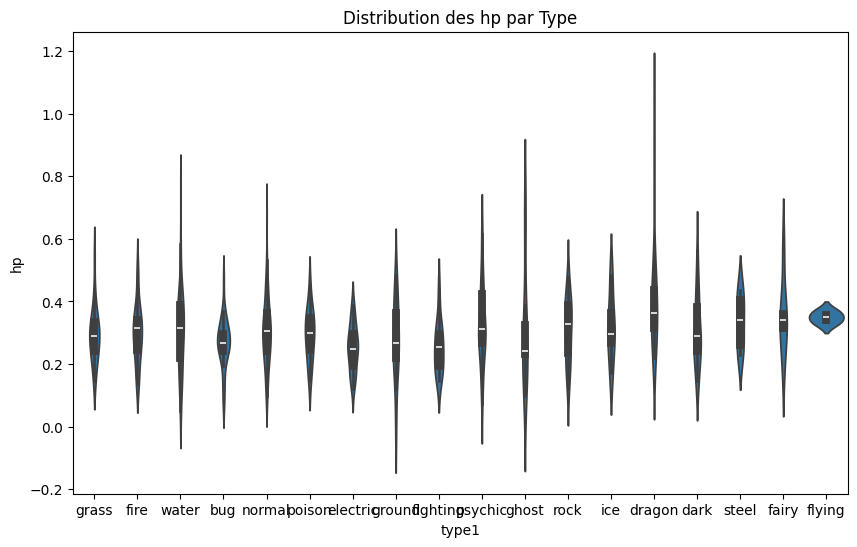

In [14]:


# 4. Heatmap des corrélations
corr = df[stats_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title("Matrice de Corrélation")
plt.show()

# 5. Violinplot des hp par type
plt.figure(figsize=(10,6))
sns.violinplot(x='type1', y='hp', data=df)
plt.xticks()
plt.title("Distribution des hp par Type")
plt.show()


## Exercice 8 : Pandas - GroupBy et Statistiques Avancées

1. Trouvez le **nombre moyen de Pokémon légendaires** par type.
2. Calculez le **Pokémon le plus puissant** de chaque type (basé sur la somme des statistiques).
3. Affichez les **3 types ayant la défense moyenne la plus élevée**.
4. Créez une colonne `Strong` qui est `True` si la somme des statistiques est >600.
5. Déterminez le **pourcentage de Pokémon forts** dans chaque type.


In [10]:

# 1. Nombre moyen de Pokémon légendaires par type
is_legendary_by_type = df.groupby('type1')['is_legendary'].mean()
print("Proportion de Pokémon légendaires par type ", is_legendary_by_type)

# 2. Pokémon le plus puissant par type
most_powerful_by_type = df.loc[df.groupby('type1')['base_total'].idxmax()]
print("Pokémon le plus puissant par type ", most_powerful_by_type[['type1','name','base_total']])

# 3. Top 3 types avec la défense moyenne la plus élevée
mean_defense_by_type = df.groupby('type1')['defense'].mean().sort_values(ascending=False)
top_3_defense = mean_defense_by_type.head(3)
print("Top 3 types avec la défense moyenne la plus élevée ", top_3_defense)

# 4. Création de la colonne Strong
df['Strong'] = df['base_total'] < 600

# 5. Pourcentage de Pokémon forts par type
strong_by_type = df.groupby('type1')['Strong'].mean() * 100
print("Pourcentage de Pokémon forts (base_total < 600) par type ", strong_by_type)

Proportion de Pokémon légendaires par type  type1
bug         0.088235
dark        0.105263
dragon      0.388889
electric    0.178571
fairy       0.166667
fighting    0.000000
fire        0.142857
flying      0.500000
ghost       0.090909
grass       0.148148
ground      0.133333
ice         0.090909
normal      0.053571
poison      0.000000
psychic     0.454545
rock        0.187500
steel       0.500000
water       0.107143
Name: is_legendary, dtype: float64
Pokémon le plus puissant par type          type1       name  base_total
126       bug     Pinsir    0.689655
716      dark    Yveltal    0.827586
383    dragon   Rayquaza    1.000000
144  electric     Zapdos    0.655172
715     fairy    Xerneas    0.827586
447  fighting    Lucario    0.732759
249      fire      Ho-Oh    0.827586
640    flying   Tornadus    0.655172
486     ghost   Giratina    0.827586
253     grass   Sceptile    0.741379
382    ground    Groudon    0.982759
143       ice   Articuno    0.655172
492    normal     Arc